# **Descrição do código**

<p>Este código será usado para solução do problema proposto no projeto da disciplina de Segurança e Auditoria de Sistemas, UTFPR-CP.</p>
<p>Objetivo do trabalho: desenvolver um Network Intrusion Detection System (NIDS), ou seja, um modelo de machine learning capaz de classificar se um fluxo de pacotes em uma rede representa uma ameaça ou não, e, caso represente, especifique o tipo de ameaça.</p>
Dataset utilizado: NSL-KDD, disponibilizado pela Universidade de New Brunswick (UNB).</p>


[Link para o NSL-KDD](https://www.unb.ca/cic/datasets/nsl.html)

O código será segmentado em três partes, sendo elas:
- Análise exploratória, limpeza e manipulação dos dados;
- Criação de gráficos para visualização dos dados;
- Construção de modelos preditivos, buscando testar diferentes algoritmos de classificação.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#carregando os dados de treino
dados_treino = pd.read_csv("dados/KDDTrain+.txt", header=None)
col_names = ["duration","protocol type","service","flag","src_bytes","dst_bytes",
             "land","wrong_fragment","urgent","hot","num_failed_logins","logged_in",
             "num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
             "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count",
             "serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate",
             "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
             "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack type","attack level"]
#colocando os índices das respectivas colunas do dataset
dados_treino.columns = col_names
dados_treino.head()

,duration,protocol type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack type,attack level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [3]:
#informações das dimensões do dataset
dados_treino.shape


(125973, 43)

In [4]:
#verificando se há valores nulos
dados_treino.isnull().sum()[dados_treino.isnull().sum() > 0]

Series([], dtype: int64)

In [5]:
#resumo estatístico básico dos atributos
dados_treino.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [6]:
#verificando se há valores duplicados
dados_treino.duplicated().sum()

0

In [7]:
#contando os registros por tipo de ataque
dados_treino["attack type"].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack type, dtype: int64

In [8]:
#Rotulando os ataques por tipo de ataque
#0 - normal
#1 - DoS
#2 - Probe
#3 - U2R
#4 - R2L
tipo_ataques = {
    "normal": 0,
    "apache2": 1,
    "back": 1,
    "land": 1,
    "neptune": 1,
    "mailbomb": 1,
    "pod": 1,
    "processtable": 1,
    "smurf": 1,
    "teardrop": 1,
    "udpstorm": 1,
    "worm": 1,
    "ipsweep": 2,
    "mscan": 2,
    "nmap": 2,
    "portsweep": 2,
    "saint": 2,
    "satan": 2,
    "buffer_overflow": 3,
    "loadmodule": 3,
    "perl": 3,
    "ps": 3,
    "rootkit": 3,
    "sqlattack": 3,
    "xterm": 3,
    "ftp_write": 4,
    "guess_passwd": 4,
    "httptunnel": 4,
    "imap": 4,
    "multihop": 4,
    "named": 4,
    "phf": 4,
    "sendmail": 4,
    "snmpgetattack": 4,
    "spy": 4,
    "snmpguess": 4,
    "warezclient": 4,
    "warezmaster": 4,
    "xlock": 4,
    "xsnoop": 4
}

In [9]:
#Realizando um mapeamento dos ataques e checando os valores
dados_treino["attack type"] = dados_treino["attack type"].map(tipo_ataques)
dados_treino["attack type"].value_counts()

0    67343
1    45927
2    11656
4      995
3       52
Name: attack type, dtype: int64

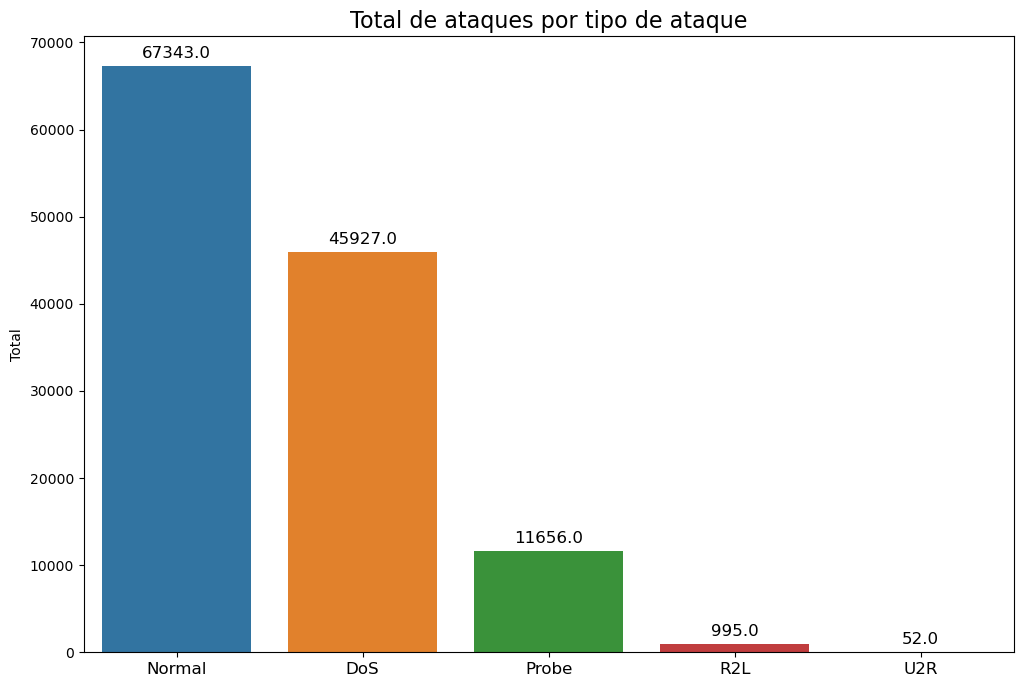

In [10]:
plt.figure(figsize=(12,8))
plt.title("Total de ataques por tipo de ataque", fontsize = 16)
splot = sns.barplot(x = ["Normal","DoS","Probe","R2L","U2R"], y = dados_treino["attack type"].value_counts())
plt.ylabel("Total")
plt.xticks(fontsize = 12)
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontsize = 12)

In [11]:
#Quantidade de valores únicos por coluna
dados_treino.nunique()

duration                       2981
protocol type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

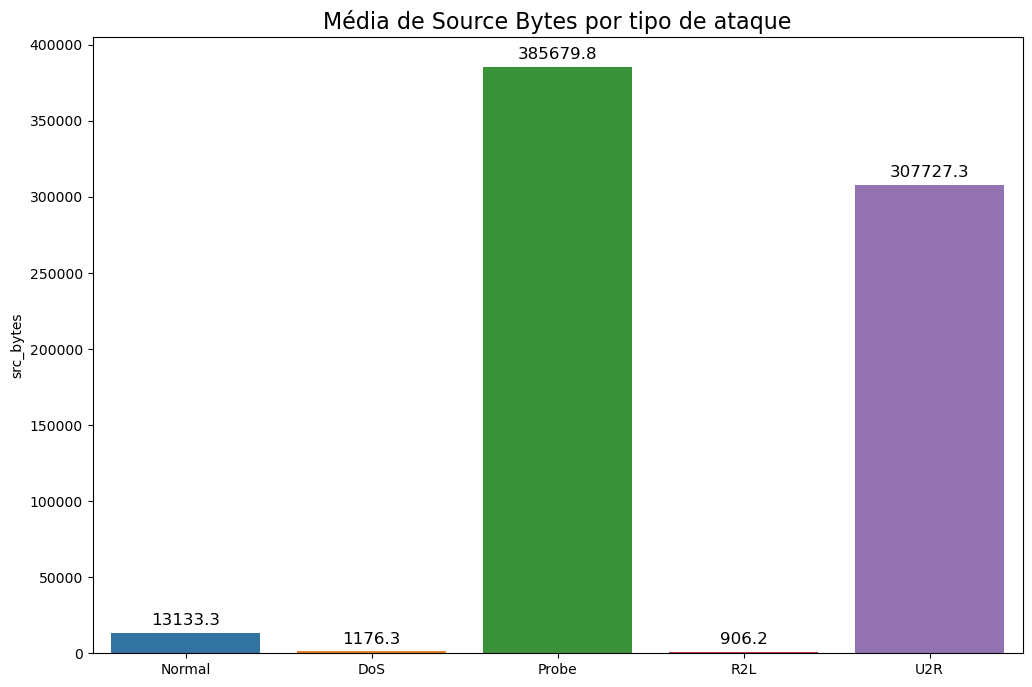

In [12]:
plt.figure(figsize=(12,8))
plt.title("Média de Source Bytes por tipo de ataque", fontsize = 16)
splot = sns.barplot(x = ["Normal","DoS","Probe","R2L","U2R"], y = dados_treino.groupby("attack type")["src_bytes"].mean())
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontsize = 12)

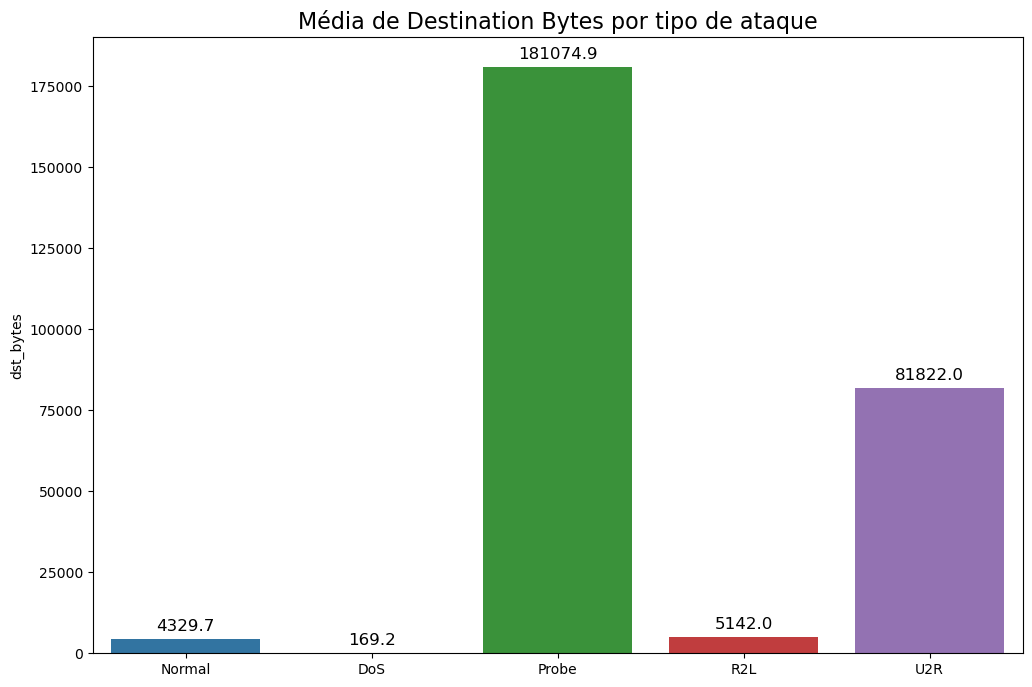

In [13]:
plt.figure(figsize=(12,8))
plt.title("Média de Destination Bytes por tipo de ataque", fontsize = 16)
splot = sns.barplot(x = ["Normal","DoS","Probe","R2L","U2R"], y = dados_treino.groupby("attack type")["dst_bytes"].mean())
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontsize = 12)

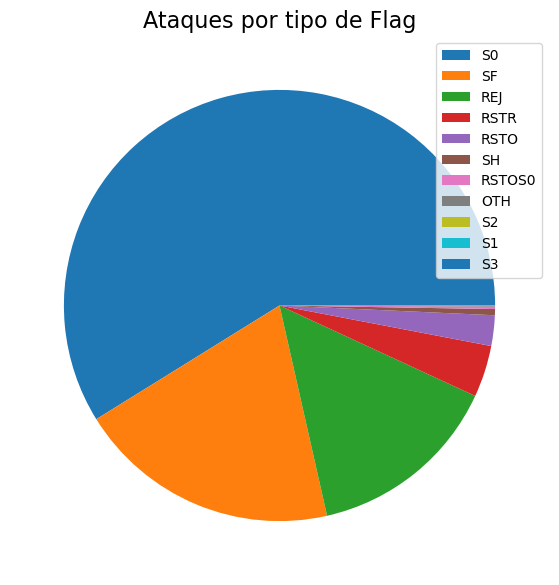

In [14]:
plt.figure(figsize=(11,7))
plt.title("Ataques por tipo de Flag", fontsize = 16)
plt.pie(dados_treino[dados_treino["attack type"] != 0]["flag"].value_counts())
plt.legend(dados_treino[dados_treino["attack type"] != 0]["flag"].value_counts().index, loc='upper right')
plt.show()

In [15]:
#Proporção de ataques por flag(%)
(dados_treino[dados_treino["attack type"] != 0]["flag"].value_counts() / dados_treino["flag"].value_counts()) * 100

OTH        76.086957
REJ        76.025995
RSTO       85.979513
RSTOS0    100.000000
RSTR       93.969434
S0         98.984247
S1          1.095890
S2          6.299213
S3          8.163265
SF         15.413970
SH         99.261993
Name: flag, dtype: float64

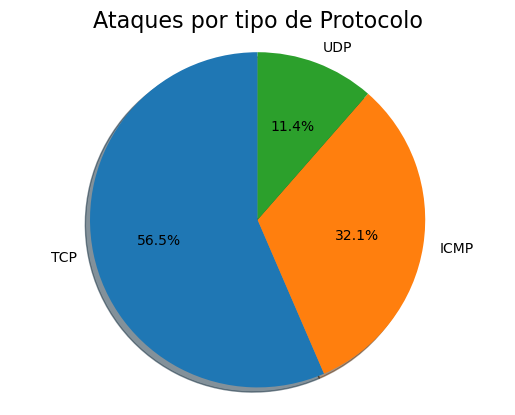

In [16]:

labels = 'TCP', 'ICMP', 'UDP'
sizes = [84.211796, 47.803562, 17.067965]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.set_title("Ataques por tipo de Protocolo", fontsize = 16)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [17]:
#porcentagem representativa da proporção de ataques por flag
(dados_treino[dados_treino["attack type"] != 0]["protocol type"].value_counts() / dados_treino["protocol type"].value_counts()) * 100

icmp    84.211796
tcp     47.803562
udp     17.067965
Name: protocol type, dtype: float64

In [18]:
print("Número médio de conexões com o mesmo host de destino que a conexão atual nos últimos dois segundos")
print("Sem ataque: ",dados_treino[dados_treino["attack type"] == 0]["count"].mean())
print("Com ataque: ",dados_treino[dados_treino["attack type"] != 0]["count"].mean())

Número médio de conexões com o mesmo host de destino que a conexão atual nos últimos dois segundos
Sem ataque:  22.517945443475938
Com ataque:  154.8499914719427


In [19]:
print("A porcentagem de conexões que foram para o mesmo serviço, entre as conexões agregadas em contagem")
print("Sem ataque: ",dados_treino[dados_treino["attack type"] == 0]["same_srv_rate"].mean() * 100)
print("Com ataque: ",dados_treino[dados_treino["attack type"] != 0]["same_srv_rate"].mean() * 100)

A porcentagem de conexões que foram para o mesmo serviço, entre as conexões agregadas em contagem
Sem ataque:  96.9360141365838
Com ataque:  30.66590482688391


In [20]:
print("A porcentagem média de conexões que foram para serviços diferentes, entre as conexões agregadas na contagem")
print("Sem ataque: ",dados_treino[dados_treino["attack type"] == 0]["diff_srv_rate"].mean() * 100)
print("Com ataque: ",dados_treino[dados_treino["attack type"] != 0]["diff_srv_rate"].mean() * 100)

A porcentagem média de conexões que foram para serviços diferentes, entre as conexões agregadas na contagem
Sem ataque:  2.878784728925027
Com ataque:  10.240951731199127


In [21]:
#Relação dos serviços com os ataques
#44 estão 100% ligados a ataques
services_p = (dados_treino[dados_treino["attack type"] != 0]["service"].value_counts() / dados_treino["service"].value_counts()) * 100
services_p.value_counts()

100.000000    44
0.534759       1
99.536321      1
88.379205      1
37.500000      1
61.028474      1
98.392283      1
3.883495       1
93.846154      1
95.506338      1
29.545455      1
40.261528      1
5.674550       1
8.219178       1
27.346939      1
47.662486      1
69.156763      1
93.825154      1
89.162669      1
0.099524       1
93.321617      1
75.287958      1
0.498339       1
Name: service, dtype: int64

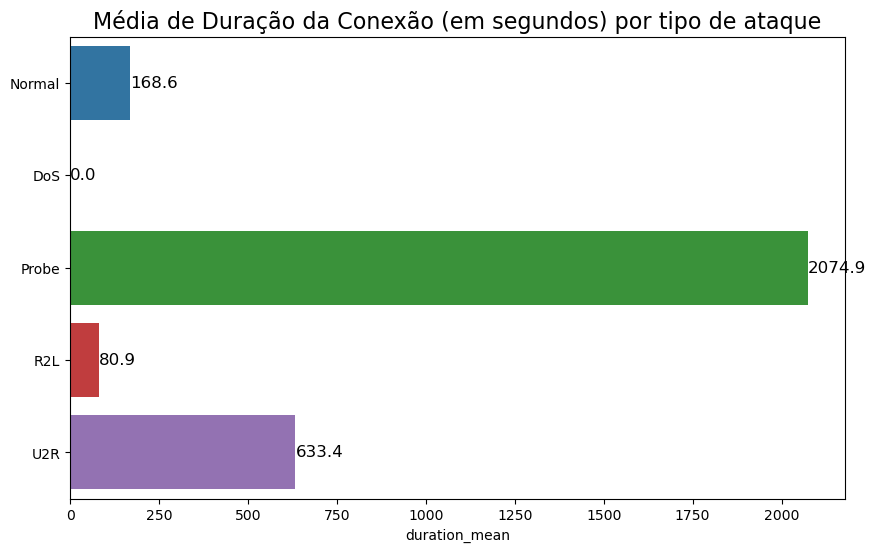

In [22]:
df_duration = pd.DataFrame({"attack": [str(label) for label in dados_treino.groupby("attack type")["duration"].mean().index],
                            "duration_mean": dados_treino.groupby("attack type")["duration"].mean()})
plt.figure(figsize=(10,6))
plt.title("Média de Duração da Conexão (em segundos) por tipo de ataque", fontsize = 16)
splot = sns.barplot(x='duration_mean', y= ["Normal","DoS","Probe","R2L","U2R"], data=df_duration)
for p in splot.patches:
    splot.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width(),p.get_y() + p.get_height()/1.5), 
                   ha = 'left', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontsize = 12)

# Mutual Information


In [23]:
#trabalhando com a seleção de atributos
#primeiramente, aplicar a técnica de mutual information
#para isso, os dados categóricos devem ser convertidos para numéricos
#remoção das colunas "attack level" e "attack type"
treino_copy = dados_treino.copy()
treino_copy.pop("attack level")
target_copy = treino_copy.pop("attack type")

#Fatorizar a colunas do tipo "object", ou seja, contendo strings
print(treino_copy.select_dtypes("object"))
for column in treino_copy.select_dtypes("object"):
    treino_copy[column], _ = treino_copy[column].factorize()

       protocol type   service flag
0                tcp  ftp_data   SF
1                udp     other   SF
2                tcp   private   S0
3                tcp      http   SF
4                tcp      http   SF
...              ...       ...  ...
125968           tcp   private   S0
125969           udp   private   SF
125970           tcp      smtp   SF
125971           tcp    klogin   S0
125972           tcp  ftp_data   SF

[125973 rows x 3 columns]


In [24]:
#Geração dos MI scores através da função:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
mi_scores = make_mi_scores(treino_copy, target_copy)

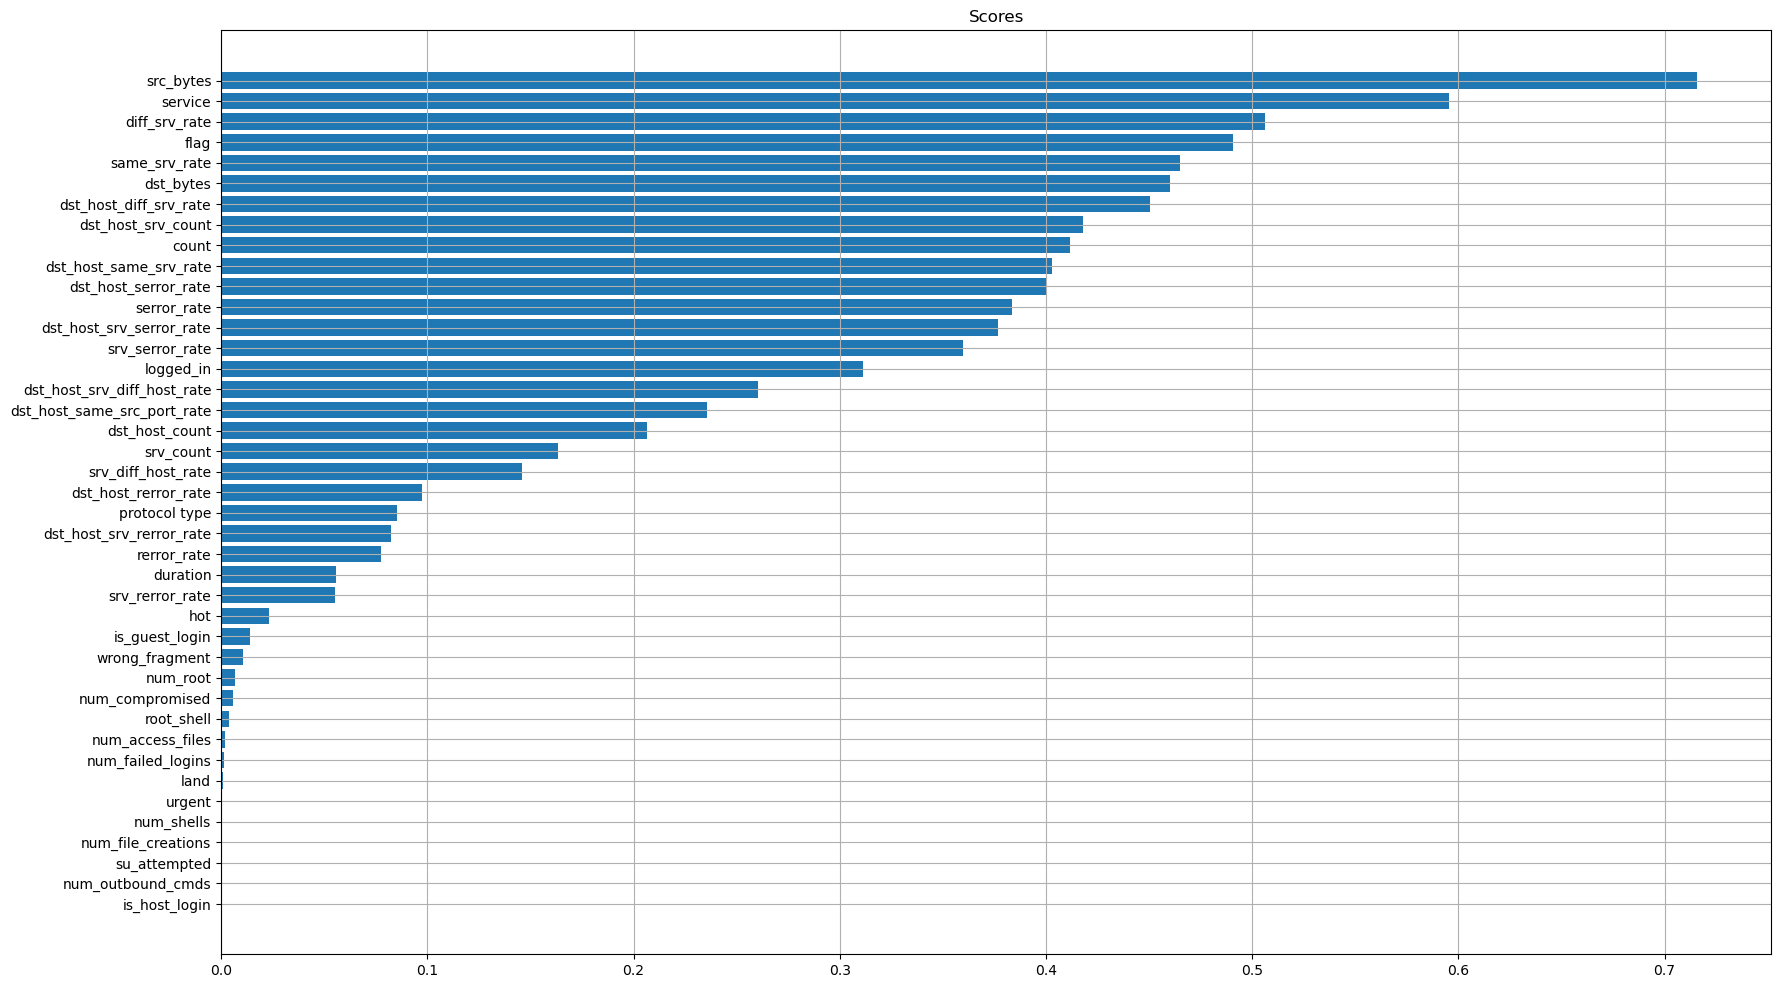

In [25]:
#Gráfico mostrando a pontuação dos MI Scores
def plot_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Scores")
    plt.grid()

plt.figure(dpi=100, figsize=(20, 12))
plot_scores(mi_scores)

# Feature Importance com Random Forest Classifier
Objetivo = Determinar quais atributos são mais relevantes para se detectar um intruso dentro de um certo pacote de dados

In [26]:
#agora gerar a importancia de features para um modelo de machine learning
#neste caso, vai ser utilizado o random forest classifier do sklearn
#a estratégia é a mesma adotada para mutual information

from sklearn.ensemble import RandomForestClassifier
def rf_feature_importance(X,y):
    RFC = RandomForestClassifier()
    RFC.fit(X,y)
    importance = RFC.feature_importances_
    importance = pd.Series(importance, name="Importance Scores", index=X.columns)
    importance = importance.sort_values(ascending=False)
    return importance
rf_importance = rf_feature_importance(treino_copy, target_copy)

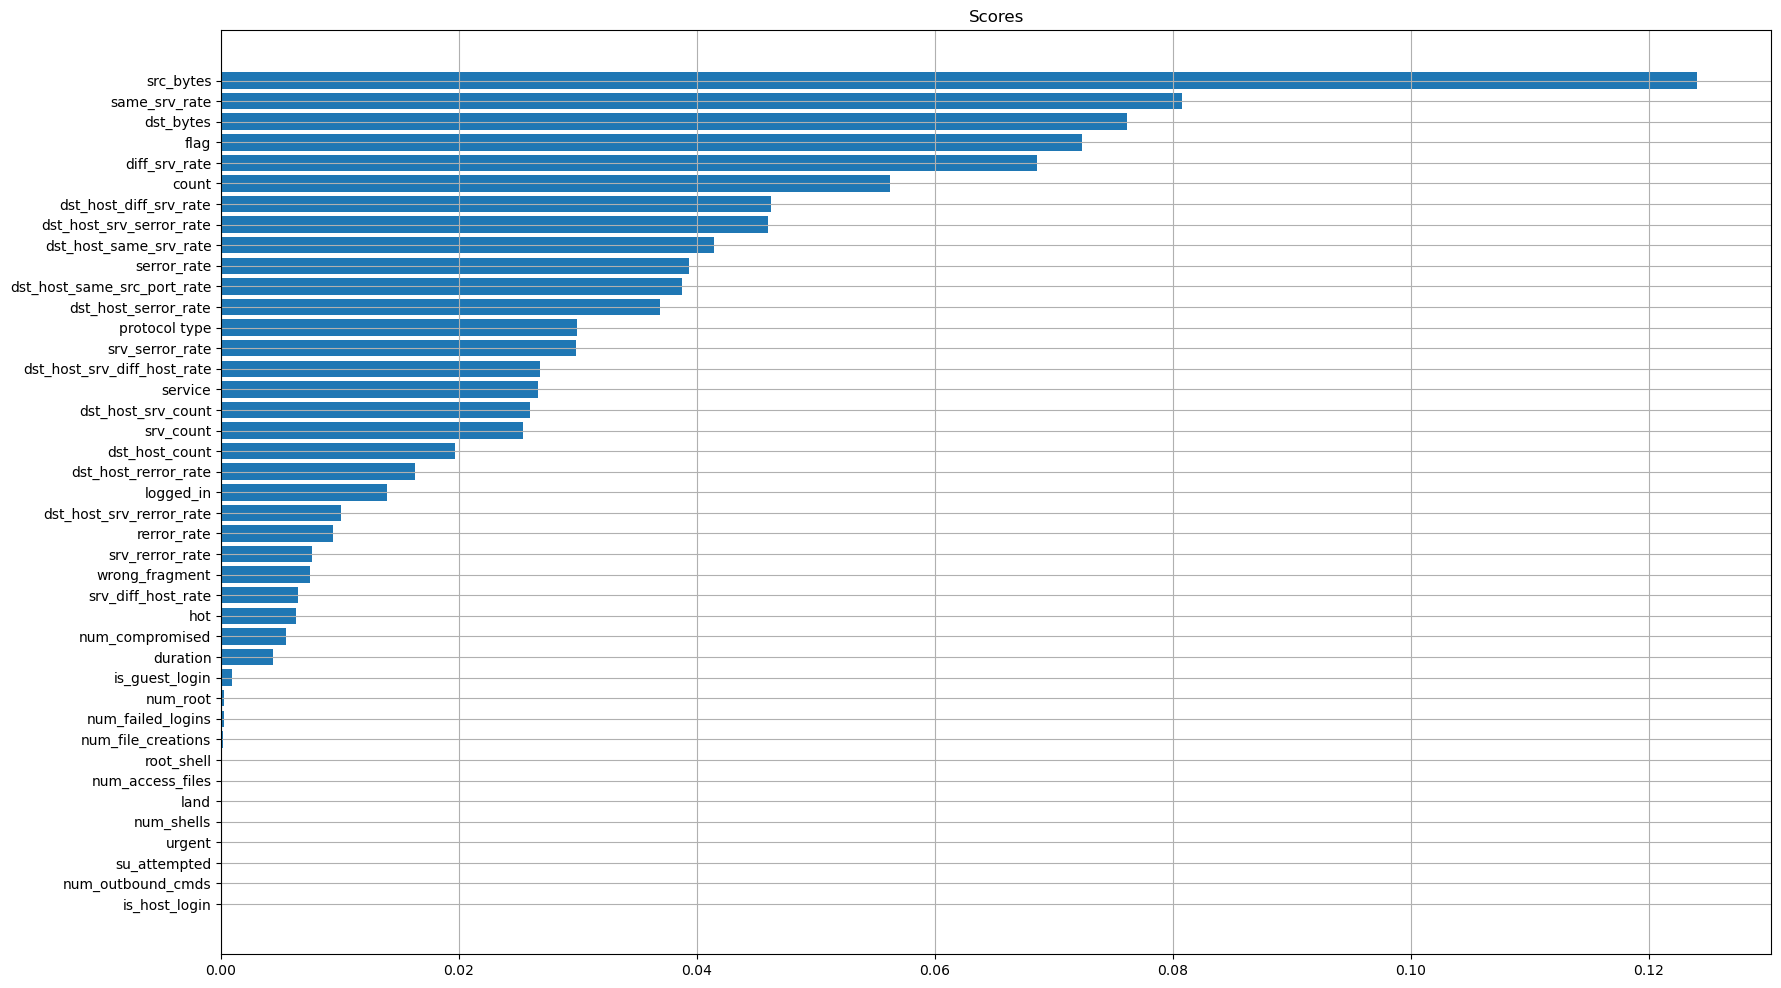

In [27]:
plt.figure(dpi=100, figsize=(20, 12))
plot_scores(rf_importance)

# Feature Selection
Após isso, podemos selecionar os atributos mais relevantes com base nas informações cedidas pelos gráficos


In [28]:
#dados de treino
atributos_selecionados = ["src_bytes","flag","protocol type","count","dst_bytes","duration",
                          "diff_srv_rate","same_srv_rate"]

#selecionando as atributos mais relevantes e separando-as em X_train
x_train = dados_treino.loc[:,atributos_selecionados]

y_train = dados_treino["attack type"]

In [29]:
#dados de teste
dados_teste = pd.read_csv("dados/KDDTest+.txt", header=None)
dados_teste.columns = col_names

dados_teste["attack type"] = dados_teste["attack type"].map(tipo_ataques)
x_test = dados_teste.loc[:,atributos_selecionados]
y_test = dados_teste["attack type"]

In [30]:
#criando os processors
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

categorical_cols = [column for column in x_train.select_dtypes("object")]
numerical_cols = list(set(atributos_selecionados) - set(categorical_cols))

numerical_transformer = MinMaxScaler()

categorical_transformer = OneHotEncoder(handle_unknown='ignore',sparse=False)

preprocessor = ColumnTransformer(transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
            ])

# **Criação dos Modelos**

### Serão usadas três técnicas de ML, sendo elas: Decision Tree, Random Forest e Support Vector Machines
Pré-processamento realizado aravés da seleção de atributos (Feature Selection)

In [31]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=0)
rf_model = RandomForestClassifier(random_state=0)
svm_model = SVC(random_state=0)

In [32]:
#criando os pipelines
from sklearn.pipeline import Pipeline

tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', tree_model)])
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', rf_model)])
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', svm_model)])

In [33]:
#treinando os modelos e gerando as previsões
np.random.seed(1234)
tree_pipeline.fit(x_train,y_train)
tree_predictions = tree_pipeline.predict(x_test)

np.random.seed(1234)
rf_pipeline.fit(x_train,y_train)
rf_predictions = rf_pipeline.predict(x_test)

np.random.seed(1234)
svm_pipeline.fit(x_train,y_train)
svm_predictions = svm_pipeline.predict(x_test)

### Avaliação dos Modelos

In [34]:
from sklearn.metrics import classification_report,accuracy_score, precision_recall_fscore_support
print("Resultados Decision Tree:")
print(accuracy_score(y_test, tree_predictions))
print(precision_recall_fscore_support(y_test, tree_predictions))
print(classification_report(y_test, tree_predictions))

Resultados Decision Tree:
0.763972675656494
(array([0.67040295, 0.96512936, 0.84495368, 0.92307692, 0.06756757]), array([0.97312326, 0.80509383, 0.71581991, 0.35820896, 0.0034662 ]), array([0.79388415, 0.87787766, 0.77504472, 0.51612903, 0.00659413]), array([9711, 7460, 2421,   67, 2885], dtype=int64))
              precision    recall  f1-score   support

           0       0.67      0.97      0.79      9711
           1       0.97      0.81      0.88      7460
           2       0.84      0.72      0.78      2421
           3       0.92      0.36      0.52        67
           4       0.07      0.00      0.01      2885

    accuracy                           0.76     22544
   macro avg       0.69      0.57      0.59     22544
weighted avg       0.71      0.76      0.72     22544



In [35]:
print("Resultados Random Forest:")
print(accuracy_score(y_test, rf_predictions))
print(precision_recall_fscore_support(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Resultados Random Forest:
0.7727998580553584
(array([0.6711862 , 0.96669808, 0.86689092, 1.        , 0.83333333]), array([0.97363814, 0.82493298, 0.74514663, 0.05970149, 0.0017331 ]), array([0.79460459, 0.89020686, 0.80142159, 0.11267606, 0.00345901]), array([9711, 7460, 2421,   67, 2885], dtype=int64))
              precision    recall  f1-score   support

           0       0.67      0.97      0.79      9711
           1       0.97      0.82      0.89      7460
           2       0.87      0.75      0.80      2421
           3       1.00      0.06      0.11        67
           4       0.83      0.00      0.00      2885

    accuracy                           0.77     22544
   macro avg       0.87      0.52      0.52     22544
weighted avg       0.81      0.77      0.72     22544



In [36]:
import warnings
warnings.filterwarnings('ignore')

print("Resultados Support Vector Machines:")
print(accuracy_score(y_test, svm_predictions))
print(precision_recall_fscore_support(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

Resultados Support Vector Machines:
0.7416607523066004
(array([0.66433811, 0.96953689, 0.66823529, 0.        , 0.        ]), array([0.97930182, 0.73806971, 0.70384139, 0.        , 0.        ]), array([0.79164239, 0.83811553, 0.68557634, 0.        , 0.        ]), array([9711, 7460, 2421,   67, 2885], dtype=int64))
              precision    recall  f1-score   support

           0       0.66      0.98      0.79      9711
           1       0.97      0.74      0.84      7460
           2       0.67      0.70      0.69      2421
           3       0.00      0.00      0.00        67
           4       0.00      0.00      0.00      2885

    accuracy                           0.74     22544
   macro avg       0.46      0.48      0.46     22544
weighted avg       0.68      0.74      0.69     22544



In [37]:
#transformando todos os ataques para 1 e comportamento normal para 0
y_train_binary = pd.Series(y_train.map(lambda x: 0 if x == 0 else 1))
y_test_binary = pd.Series(y_test.map(lambda x: 0 if x == 0 else 1))

In [38]:
tree_binary_model = DecisionTreeClassifier(random_state=0)
rf_binary_model = RandomForestClassifier(random_state=0)
svm_binary_model = SVC(random_state=0, probability=True)

In [39]:
#criando os pipelines
tree_binary_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', tree_binary_model)])
rf_binary_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', rf_binary_model)])
svm_binary_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', svm_binary_model)])

In [40]:
#treinando os modelos e gerando as previsões
np.random.seed(1234)
tree_binary_pipeline.fit(x_train,y_train_binary)
tree_predictions_binary = tree_binary_pipeline.predict(x_test)

np.random.seed(1234)
rf_binary_pipeline.fit(x_train,y_train_binary)
rf_predictions_binary = rf_binary_pipeline.predict(x_test)

np.random.seed(1234)
svm_binary_pipeline.fit(x_train,y_train_binary)
svm_predictions_binary = svm_binary_pipeline.predict(x_test)

### Avaliação dos Modelos Binários

In [41]:
print("Resultados Decision Tree Binário:")
print(accuracy_score(y_test_binary, tree_predictions_binary))
print(precision_recall_fscore_support(y_test_binary, tree_predictions_binary))
print(classification_report(y_test_binary, tree_predictions_binary))

Resultados Decision Tree Binário:
0.7841554293825408
(array([0.67250587, 0.96859193]), array([0.97250541, 0.64162706]), array([0.79515029, 0.77191338]), array([ 9711, 12833], dtype=int64))
              precision    recall  f1-score   support

           0       0.67      0.97      0.80      9711
           1       0.97      0.64      0.77     12833

    accuracy                           0.78     22544
   macro avg       0.82      0.81      0.78     22544
weighted avg       0.84      0.78      0.78     22544



In [42]:
print("Resultados Random Forest Binário:")
print(accuracy_score(y_test_binary, rf_predictions_binary))
print(precision_recall_fscore_support(y_test_binary, rf_predictions_binary))
print(classification_report(y_test_binary, rf_predictions_binary))

Resultados Random Forest Binário:
0.7830908445706175
(array([0.67101809, 0.97005563]), array([0.97394707, 0.63866594]), array([0.7945896 , 0.77022836]), array([ 9711, 12833], dtype=int64))
              precision    recall  f1-score   support

           0       0.67      0.97      0.79      9711
           1       0.97      0.64      0.77     12833

    accuracy                           0.78     22544
   macro avg       0.82      0.81      0.78     22544
weighted avg       0.84      0.78      0.78     22544



In [43]:
print("Resultados Support Vector Machines Binário:")
print(accuracy_score(y_test_binary, svm_predictions_binary))
print(precision_recall_fscore_support(y_test_binary, svm_predictions_binary))
print(classification_report(y_test_binary, svm_predictions_binary))

Resultados Support Vector Machines Binário:
0.7796309439318666
(array([0.66622275, 0.97511176]), array([0.97878694, 0.62892543]), array([0.79281008, 0.7646613 ]), array([ 9711, 12833], dtype=int64))
              precision    recall  f1-score   support

           0       0.67      0.98      0.79      9711
           1       0.98      0.63      0.76     12833

    accuracy                           0.78     22544
   macro avg       0.82      0.80      0.78     22544
weighted avg       0.84      0.78      0.78     22544



### Binarização dos resultados da classificação não binária para testes

In [44]:
tree_predictions_convertido = pd.Series(tree_predictions).map(lambda x: 0 if x == 0 else 1).to_numpy()
rf_predictions_convertido = pd.Series(rf_predictions).map(lambda x: 0 if x == 0 else 1).to_numpy()
svm_predictions_convertido = pd.Series(svm_predictions).map(lambda x: 0 if x == 0 else 1).to_numpy()

In [45]:
#métricas de avaliação
print("Resultados Decision Tree não binários binarizados:")
print(accuracy_score(y_test_binary, tree_predictions_convertido))
print(precision_recall_fscore_support(y_test_binary, tree_predictions_convertido))
print(classification_report(y_test_binary, tree_predictions_convertido))

Resultados Decision Tree não binários binarizados:
0.7823367636621718
(array([0.67040295, 0.96910511]), array([0.97312326, 0.63796462]), array([0.79388415, 0.76941873]), array([ 9711, 12833], dtype=int64))
              precision    recall  f1-score   support

           0       0.67      0.97      0.79      9711
           1       0.97      0.64      0.77     12833

    accuracy                           0.78     22544
   macro avg       0.82      0.81      0.78     22544
weighted avg       0.84      0.78      0.78     22544



In [46]:
print("Resultados Random Forest não binários binarizados:")
print(accuracy_score(y_test_binary, rf_predictions_convertido))
print(precision_recall_fscore_support(y_test_binary, rf_predictions_convertido))
print(classification_report(y_test_binary, rf_predictions_convertido))

Resultados Random Forest não binários binarizados:
0.783179559971611
(array([0.6711862 , 0.96972922]), array([0.97363814, 0.63905556]), array([0.79460459, 0.77040864]), array([ 9711, 12833], dtype=int64))
              precision    recall  f1-score   support

           0       0.67      0.97      0.79      9711
           1       0.97      0.64      0.77     12833

    accuracy                           0.78     22544
   macro avg       0.82      0.81      0.78     22544
weighted avg       0.84      0.78      0.78     22544



In [47]:
print("Resultados Support Vector Machines não binários binarizados:")
print(accuracy_score(y_test_binary, svm_predictions_convertido))
print(precision_recall_fscore_support(y_test_binary, svm_predictions_convertido))
print(classification_report(y_test_binary, svm_predictions_convertido))

Resultados Support Vector Machines não binários binarizados:
0.7779453513129879
(array([0.66433811, 0.97557419]), array([0.97930182, 0.62557469]), array([0.79164239, 0.76232077]), array([ 9711, 12833], dtype=int64))
              precision    recall  f1-score   support

           0       0.66      0.98      0.79      9711
           1       0.98      0.63      0.76     12833

    accuracy                           0.78     22544
   macro avg       0.82      0.80      0.78     22544
weighted avg       0.84      0.78      0.77     22544



In [48]:
pickle.dump(tree_pipeline, open("models/tree_pipeline.sav", 'wb'))
pickle.dump(rf_pipeline, open("models/rf_pipeline.sav", 'wb'))
pickle.dump(svm_pipeline, open("models/svm_pipeline.sav", 'wb'))
pickle.dump(tree_binary_pipeline, open("models/tree_binary_pipeline.sav", 'wb'))
pickle.dump(rf_binary_pipeline, open("models/rf_binary_pipeline.sav", 'wb'))
pickle.dump(svm_binary_pipeline, open("models/svm_binary_pipeline.sav", 'wb'))

NameError: name 'pickle' is not defined

In [ ]:

y_prob_tree_b = tree_binary_pipeline.predict_proba(x_test)[::,1]
y_prob_rf_b = rf_binary_pipeline.predict_proba(x_test)[::,1]
y_prob_svm_b = svm_binary_pipeline.predict_proba(x_test)[::,1]

fpr1, tpr1, _ = roc_curve(y_test_binary, y_prob_tree_b)
fpr2, tpr2, _ = roc_curve(y_test_binary, y_prob_rf_b)
fpr3, tpr3, _ = roc_curve(y_test_binary, y_prob_svm_b)

auc1 = roc_auc_score(y_test_binary, y_prob_tree_b)
auc2 = roc_auc_score(y_test_binary, y_prob_rf_b)
auc3 = roc_auc_score(y_test_binary, y_prob_svm_b)

plt.figure(figsize=(12, 8))
plt.plot(fpr1,tpr1,label="DT Binary, auc="+str(auc1))
plt.plot(fpr2,tpr2,label="RF Binary, auc="+str(auc2))
plt.plot(fpr3,tpr3,label="SVM Binary, auc="+str(auc3))

plt.legend(loc=4, fontsize=12)
plt.show()